### Import necessary libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import seaborn as sns

### Import dataset

In [3]:
dataset=pd.read_csv("golden_price.csv")

### Data Cleaning and Date Preprocessing

In [4]:
dataset=dataset.drop(['Open','Minimum','Maximum','Position'],axis=1)
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset = dataset.sort_values("Date")
dataset["Date"] = (dataset["Date"] - dataset["Date"].min()).dt.days
dataset = dataset.dropna()

### Feature and Target Selection

In [5]:
x=dataset[['Date']].values
y=dataset[['Close']].values

### Split train data and test data

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Model training with train data

In [7]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Prediction and Evaluation

In [8]:
y_pred=linear_model.predict(x_test)
# print("y_pred",y_pred)
# print("y_test",y_test)

### Model visualization with simple linear regression

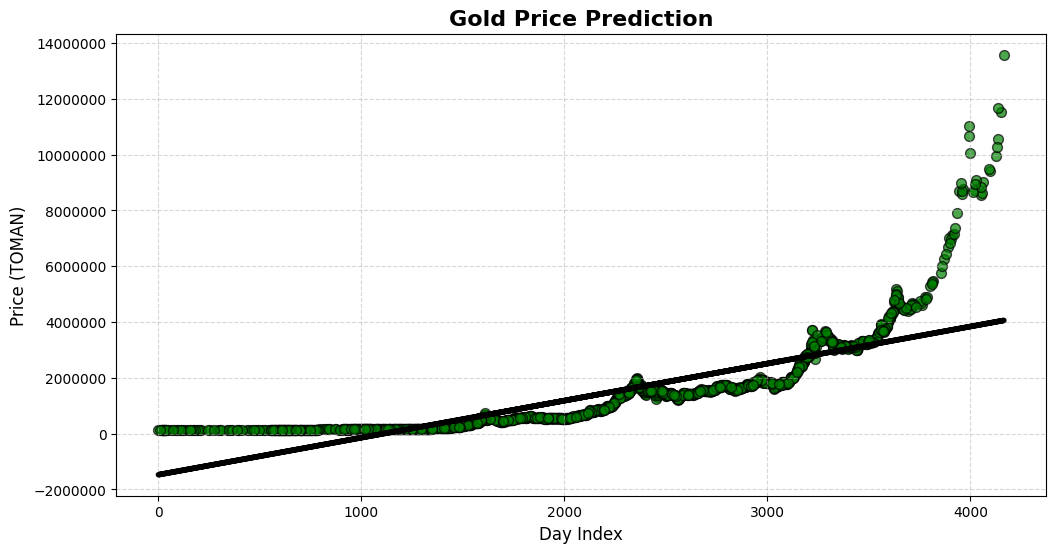

In [9]:
plt.figure(figsize=(12,6)) 
plt.scatter(x_train, y_train/10, color='green', s=50,alpha=0.7, edgecolor='k')  
plt.plot(x_train,(linear_model.predict(x_train))/10,color='black',linewidth=4)
plt.title("Gold Price Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Day Index", fontsize=12)
plt.ylabel("Price (TOMAN)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ticklabel_format(style='plain')
plt.show()

In [19]:
R2 = linear_model.score(x_test, y_test)
print("r2 score equals",R2)
MSE = mean_squared_error(y_test,y_pred)
print("mse equals",MSE)

r2 score equals 0.6315985265246206
mse equals 13220265498728.125


###  Future Price Prediction using simple linear Regression

In [18]:
day_index=4567
ypre=linear_model.predict([[day_index]])
print(ypre/10,"TOMAN")

[[4591130.14404789]] TOMAN


### Polynomial Degree Selection using K-Fold Cross Validation

In [12]:
# kf=KFold(n_splits=5,shuffle=True,random_state=42)
# degrees = [1,2,3,4,5]
# for deg in degrees:
#     mse_list = []
#     poly = PolynomialFeatures(degree=deg)
    
#     for train_index,test_index in kf.split(x):
#         x_train,x_test= x[train_index] , x[test_index]
#         y_train,y_test= y[train_index] , y[test_index]
        
#         x_poly_train = poly.fit_transform(x_train)
#         x_poly_test = poly.transform(x_test)
        
#         model=LinearRegression()
#         model.fit(x_poly_train,y_train)
        
#         y_pred=model.predict(x_poly_test)
        
#         mse=mean_squared_error(y_test,y_pred)
#         mse_list.append(mse)
#     print(f"DEGREE{deg}->Average MSE:{np.mean(mse_list)}")

### Model training with train data

In [13]:
poly=PolynomialFeatures(degree=5)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.transform(x_test)
poly_model=LinearRegression()
poly_model.fit(x_poly_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Prediction and Evaluation

In [14]:
y_pred=poly_model.predict(x_poly_test)

### Model visualization with polynomial regression

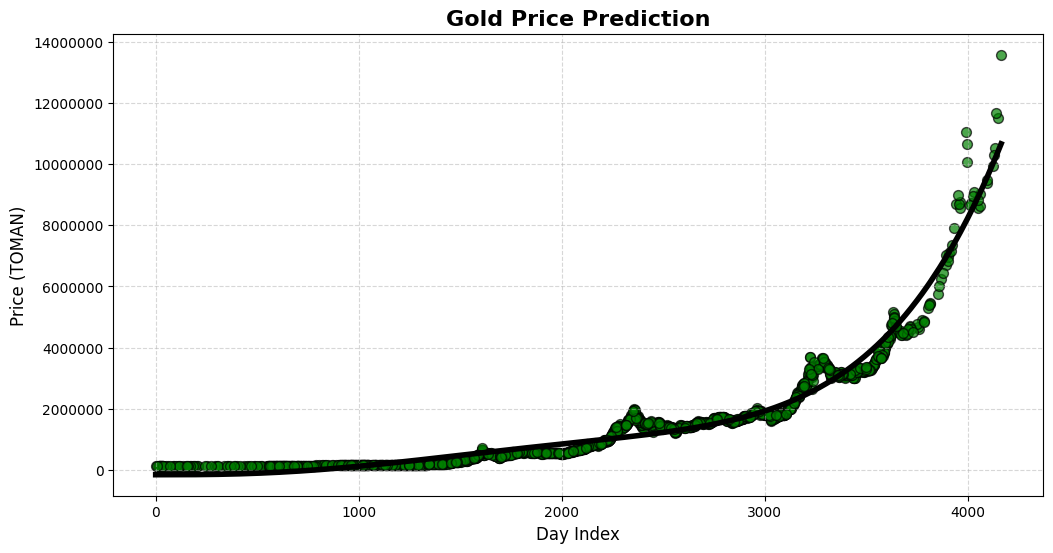

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(x_train, y_train/10, color='green', s=50, alpha=0.7, edgecolor='k')
sorted_idx = x_train[:,0].argsort()
plt.plot(x_train[sorted_idx], (poly_model.predict(x_poly_train[sorted_idx]))/10, color='black', linewidth=4)
plt.title("Gold Price Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Day Index", fontsize=12)
plt.ylabel("Price (TOMAN)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ticklabel_format(style='plain')
plt.show()

###  Future Price Prediction using simple linear Regression

In [16]:
day_index=4567
ypre = poly_model.predict(poly.transform([[day_index]]))
print(ypre/10, "TOMAN")

[[19567772.12164709]] TOMAN


In [21]:
R2 = poly_model.score(x_poly_test, y_test)
print("r2 score equals",R2)
MSE = mean_squared_error(y_test,y_pred)
print("mse equals",MSE)

r2 score equals 0.952053596387684
mse equals 13220265498728.125
